In [1]:
import numpy as np
import xarray as xr
import extremespaper as ex
import viz
import mplRC
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cftime
import datetime as dt
import os
import glob
import matplotlib.cm as mcm
import warnings
import dask.array as da
mplRC.paperRC2()

/home/ords/crd/ccrn/reo000/mamba_files/envs/mpy39dc/lib/python3.9/site-packages/pyproj/__init__.py:95: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
warnings.filterwarnings(action='ignore',message='Mean of empty slice',category=RuntimeWarning)
warnings.filterwarnings(action='ignore',message='invalid value encountered in scalar divide',
                        category=RuntimeWarning)

In [3]:
exst={}
for ivar in ('omega_arag_0','spco2'):
    for iscen in ('ESM4_historical_D1','ESM4_ssp126_D1','ESM4_ssp370_D1'):
        fp=ex.exstats_path(ivar,iscen,ex.dictScenDates[iscen],'ESM4_historical_D1',ex.dictScenDates['ESM4_historical_D1'],'daily',ex.exdirs[ivar],.95 if ex.exdirs[ivar]>0 else .05,False)
        exst[(ivar,iscen)]=xr.open_dataset(fp)

In [4]:
exac={}
for iscen in ('ESM4_historical_D1','ESM4_ssp126_D1','ESM4_ssp370_D1'):
    fp=ex.abs_coral_path(iscen,ex.dictScenDates[iscen])
    exac[iscen]=xr.open_dataset(fp)

In [5]:
proj=ccrs.Robinson(central_longitude=-170)
lons=viz.lonvec1x1
lats=viz.latvec1x1
# cm1=cmocean.cm.thermal
# cm2=cmocean.cm.balance
# cm1.set_bad('w',alpha=0)
# cm2.set_bad('w',alpha=0)

In [6]:
dhwct={'hist':exac['ESM4_historical_D1']['dhw_pct'],
       's126':exac['ESM4_ssp126_D1']['dhw_pct'],
       's370':exac['ESM4_ssp370_D1']['dhw_pct']}
om3ct={'hist':exac['ESM4_historical_D1']['om3_pct'],
       's126':exac['ESM4_ssp126_D1']['om3_pct'],
       's370':exac['ESM4_ssp370_D1']['om3_pct']}
omdhw3ct={'hist':exac['ESM4_historical_D1']['om3_and_dhw_pct'],
       's126':exac['ESM4_ssp126_D1']['om3_and_dhw_pct'],
       's370':exac['ESM4_ssp370_D1']['om3_and_dhw_pct']}
omdhw3ct_or={'hist':exac['ESM4_historical_D1']['om3_or_dhw_pct'],
       's126':exac['ESM4_ssp126_D1']['om3_or_dhw_pct'],
       's370':exac['ESM4_ssp370_D1']['om3_or_dhw_pct']}

In [7]:
oms01ct={'hist':exac['ESM4_historical_D1']['om1_pct'],
       's126':exac['ESM4_ssp126_D1']['om1_pct'],
       's370':exac['ESM4_ssp370_D1']['om1_pct']}

In [8]:
# 1atm = 101325 Pa; convert 1000 mu-atm to Pa
# 1000*1e-6 atm * 101325 Pa/1atm -> 
spco2ct={'hist':exac['ESM4_historical_D1']['spc1000uatm_pct'],
       's126':exac['ESM4_ssp126_D1']['spc1000uatm_pct'],
       's370':exac['ESM4_ssp370_D1']['spc1000uatm_pct']}

In [9]:
# 1atm = 101325 Pa; convert 1000 mu-atm to Pa
# 1000*1e-6 atm * 101325 Pa/1atm -> 
spco2ct2={'hist':exst[('spco2','ESM4_historical_D1')].is_exAbs_101_325_sum/(365*40)*100,
         's126':exst[('spco2','ESM4_ssp126_D1')].is_exAbs_101_325_sum/(365*40)*100,
         's370':exst[('spco2','ESM4_ssp370_D1')].is_exAbs_101_325_sum/(365*40)*100}

In [10]:
np.max(np.abs(np.array(spco2ct['s370']-spco2ct2['s370'])))

0.0

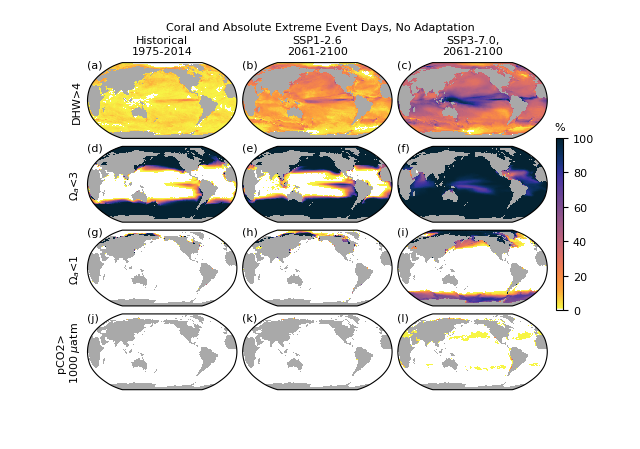

In [11]:
cmin=1/(365*40)*100
fig,ax=plt.subplots(4,4,figsize=(6.2,4.3),gridspec_kw={'hspace':.05,'wspace':.05,
                                                   'width_ratios':[1,1,1,.1]},
                                      subplot_kw={'projection':proj,'facecolor':'darkgray'})#'gainsboro'
for iax in ax[:,3]: iax.remove()
axcb=fig.add_axes([.88,.3,.012,.4])
#ax[1,3]=fig.add_axes([.87,.16,.02,.3])
# xones=np.ones(np.shape(oms50['s370'].dat[0,:,:]))
ax[0,0].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,dhwct['hist']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)
ax[0,1].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,dhwct['s126']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)
m=ax[0,2].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,dhwct['s370']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)
ax[1,0].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,om3ct['hist']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)
ax[1,1].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,om3ct['s126']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)
m=ax[1,2].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,om3ct['s370']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)

ax[2,0].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,oms01ct['hist']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)
ax[2,1].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,oms01ct['s126']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)
m=ax[2,2].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,oms01ct['s370']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)

ax[3,0].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,spco2ct['hist']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)
ax[3,1].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,spco2ct['s126']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)
m=ax[3,2].pcolormesh(lons,lats,np.ma.masked_where(viz.wet1x1==0,spco2ct['s370']),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm1)

fig.colorbar(mcm.ScalarMappable(norm=mcolors.Normalize(vmin=0,vmax=100), cmap=viz.cm1b),cax=axcb);axcb.set_title('%')
fig.suptitle(f'Coral and Absolute Extreme Event Days, No Adaptation',y=.97)

for iax in (ax[0,0],ax[0,1],ax[0,2],ax[1,0],ax[1,1],ax[1,2],ax[2,0],ax[2,1],ax[2,2],
            ax[3,0],ax[3,1],ax[3,2]):
    iax.set_xticks([])
    iax.set_yticks([])
ax[0,0].set_title('Historical\n1975-2014')
ax[0,1].set_title('SSP1-2.6\n2061-2100')
ax[0,2].set_title('SSP3-7.0,\n2061-2100')
ax[0,0].set_ylabel('DHW>4')
ax[1,0].set_ylabel('$\Omega _a$<3')
ax[2,0].set_ylabel('$\Omega _a$<1')
ax[3,0].set_ylabel('pCO2>\n1000 $\mu$atm')

axa=fig.add_axes(rect=[0,0,1,1])
axa.set_axis_off()
axa.annotate('(a)',xy=(0.125, 0.865))
axa.annotate('(b)',xy=(0.374, 0.865))
axa.annotate('(c)',xy=(0.625, 0.865))
axa.annotate('(d)',xy=(0.125, 0.67))
axa.annotate('(e)',xy=(0.374, 0.67))
axa.annotate('(f)',xy=(0.625, 0.67))
axa.annotate('(g)',xy=(0.125, 0.475))
axa.annotate('(h)',xy=(0.374, 0.475))
axa.annotate('(i)',xy=(0.625, 0.475))
axa.annotate('(j)',xy=(0.125, 0.275))
axa.annotate('(k)',xy=(0.374, 0.275))
axa.annotate('(l)',xy=(0.625, 0.275))
fig.savefig(f'global_extremes_coral_newcm.png',
            dpi=300,bbox_inches='tight')

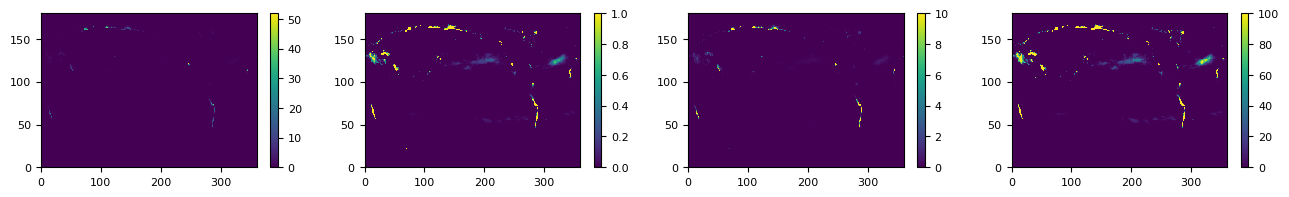

In [12]:
fig,ax=plt.subplots(1,4,figsize=(16,2))
m=ax[0].pcolormesh(spco2ct['s370'])
fig.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(spco2ct['s370'],vmin=0,vmax=1)
fig.colorbar(m,ax=ax[1])
m=ax[2].pcolormesh(spco2ct['s370'],vmin=0,vmax=10)
fig.colorbar(m,ax=ax[2])
m=ax[3].pcolormesh(exst[('spco2','ESM4_ssp370_D1')].is_exAbs_101_325_sum,vmin=0,vmax=100)
fig.colorbar(m,ax=ax[3])

<xarray.DataArray 'is_exAbs_101_325_sum' ()> Size: 8B
array(105)


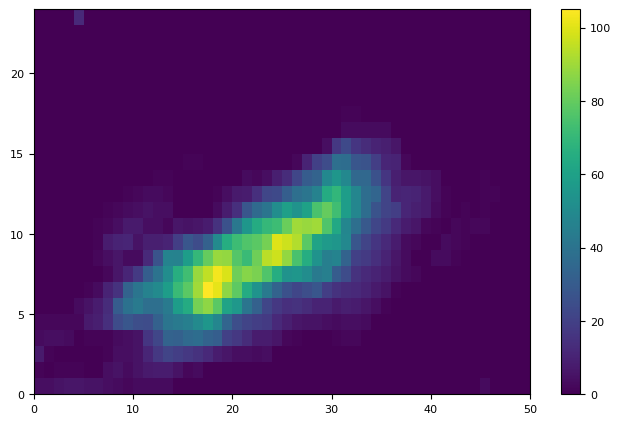

In [13]:
plt.pcolormesh(exst[('spco2','ESM4_ssp370_D1')].is_exAbs_101_325_sum[116:140,300:350])
plt.colorbar()
print(np.max(exst[('spco2','ESM4_ssp370_D1')].is_exAbs_101_325_sum[116:140,300:350]))

In [14]:
105/(40*365)*100

0.7191780821917808

pCOO>1000 for more than 100 days (0.7% of the time) out of the 40 year period in ssp 370

In [15]:
np.sum(np.ma.masked_where(viz.wet1x1==0,om3ct['s370'])==0)

28

surface omega<1


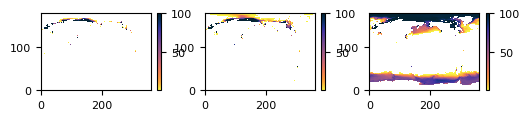

In [16]:
fig,ax=plt.subplots(1,3,figsize=(6,1))
m=ax[0].pcolormesh(oms01ct['hist'],vmin=cmin,vmax=100,cmap=viz.cm1)
fig.colorbar(m,ax=ax[0])
m=ax[1].pcolormesh(oms01ct['s126'],vmin=cmin,vmax=100,cmap=viz.cm1)
fig.colorbar(m,ax=ax[1])
m=ax[2].pcolormesh(oms01ct['s370'],vmin=cmin,vmax=100,cmap=viz.cm1)
fig.colorbar(m,ax=ax[2])
print('surface omega<1')

In [17]:
print(np.max(oms01ct['hist'].values),np.max(oms01ct['s126'].values),np.max(oms01ct['s370'].values))

100.0 100.0 100.0


In [18]:
print(np.sum(oms01ct['hist'].values>0),np.sum(oms01ct['s126'].values>0),np.sum(oms01ct['s370'].values>0))

1242 4017 17990


In [19]:
masks=ex.loadMasks()

In [20]:
masks['Coral']

class maskInfo:{'mask': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'llats': array([ 55,  55,  57, ..., 120, 122, 122]), 'llons': array([150, 151, 115, ..., 131, 294, 295]), 'sitename': 'Grid Cells Containing Coral', 'maxlat': 32.479385, 'minlat': -34.4919, 'maxlon': 59.5, 'minlon': 59.5}

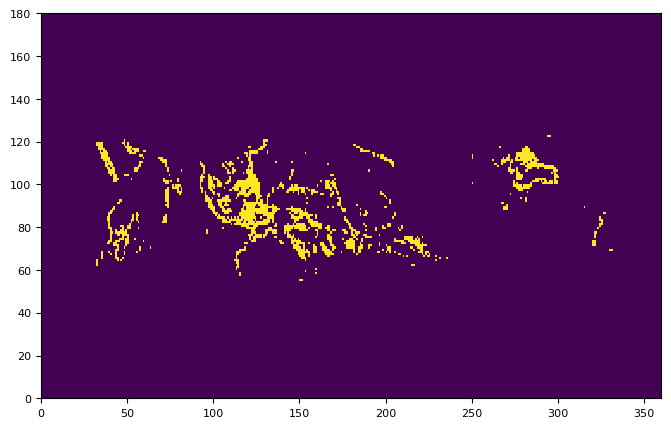

In [21]:
plt.pcolormesh(masks['Coral'].mask)

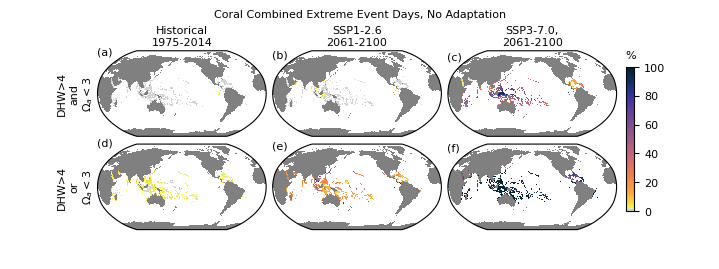

In [22]:
cmin=1/(365*40)*100
fig,ax=plt.subplots(2,4,figsize=(7,2.4),gridspec_kw={'hspace':.02,'wspace':.05,
                                                   'width_ratios':[1,1,1,.1]},
                                      subplot_kw={'projection':proj,'facecolor':'w'})
for iax in ax[:,3]: iax.remove()
axcb=fig.add_axes([.88,.2,.012,.6],facecolor='lightgray')
#ax[1,3]=fig.add_axes([.87,.16,.02,.3])
xones=np.ones(np.shape(oms01ct['s370'][:,:]))

ax[0,0].pcolormesh(lons,lats,np.ma.masked_where((masks['Coral'].mask==0)&(viz.wet1x1>0),np.where(viz.wet1x1==0,1e3,omdhw3ct['hist'])),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm2)
ax[0,1].pcolormesh(lons,lats,np.ma.masked_where((masks['Coral'].mask==0)&(viz.wet1x1>0),np.where(viz.wet1x1==0,1e3,omdhw3ct['s126'])),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm2)
m=ax[0,2].pcolormesh(lons,lats,np.ma.masked_where((masks['Coral'].mask==0)&(viz.wet1x1>0),np.where(viz.wet1x1==0,1e3,omdhw3ct['s370'])),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm2)

ax[1,0].pcolormesh(lons,lats,np.ma.masked_where((masks['Coral'].mask==0)&(viz.wet1x1>0),np.where(viz.wet1x1==0,1e3,omdhw3ct_or['hist'])),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm2)
ax[1,1].pcolormesh(lons,lats,np.ma.masked_where((masks['Coral'].mask==0)&(viz.wet1x1>0),np.where(viz.wet1x1==0,1e3,omdhw3ct_or['s126'])),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm2)
m=ax[1,2].pcolormesh(lons,lats,np.ma.masked_where((masks['Coral'].mask==0)&(viz.wet1x1>0),np.where(viz.wet1x1==0,1e3,omdhw3ct_or['s370'])),
                   transform=ccrs.PlateCarree(),vmin=cmin,vmax=100,cmap=viz.cm2)

fig.colorbar(mcm.ScalarMappable(norm=mcolors.Normalize(vmin=0,vmax=100), cmap=viz.cm2b),cax=axcb)
fig.suptitle(f'Coral Combined Extreme Event Days, No Adaptation',y=1.04);axcb.set_title('%')
cmk=plt.get_cmap('gray_r')
cmk.set_over('w',alpha=0)
cmk.set_under('gray',alpha=1)# set scale to only use under and over; cmap doesn't matter
for iax in (ax[0,0],ax[0,1],ax[0,2],ax[1,0],ax[1,1],ax[1,2],):
    iax.set_xticks([])
    iax.set_yticks([])
    #iax.pcolormesh(lons,lats,viz.wet1x1,transform=ccrs.PlateCarree(),vmin=.1,vmax=.9,cmap=viz.cmk)
ax[0,0].set_title('Historical\n1975-2014',pad=4)
ax[0,1].set_title('SSP1-2.6\n2061-2100',pad=4)
ax[0,2].set_title('SSP3-7.0,\n2061-2100',pad=4)
ax[0,0].set_ylabel('DHW>4\nand\n$\Omega _a<$3',labelpad=2)
ax[1,0].set_ylabel('DHW>4\nor\n$\Omega _a<$3',labelpad=2)

axa=fig.add_axes(rect=[0,0,1,1])
axa.set_axis_off()
axa.annotate('(a)',xy=(0.125, 0.85))
axa.annotate('(b)',xy=(0.374, 0.84))
axa.annotate('(c)',xy=(0.625, 0.83))
axa.annotate('(d)',xy=(0.125, 0.47))
axa.annotate('(e)',xy=(0.374, 0.46))
axa.annotate('(f)',xy=(0.625, 0.45))
fig.savefig(f'multistress_coral_newcm.png',
            dpi=400,bbox_inches='tight')

In [23]:
hascoral={}
hascoral['Coral']=False
for lkey in ['NE Canyons','Steller', 'Monterey Bay', 'FL Keys', 'La Parg', 'Samoa', 
        'Humpback', 'Pac Remote',]:
    print(lkey, np.nansum(masks[lkey].mask*masks['Coral'].mask))
    if np.nansum(masks[lkey].mask*masks['Coral'].mask)>0:
        hascoral[lkey]=True
    else:
        hascoral[lkey]=False

NE Canyons 0
Steller 0
Monterey Bay 0
FL Keys 5
La Parg 2
Samoa 4
Humpback 9
Pac Remote 8


In [24]:
# organize data in dictionary
# PctAT=pcercent of area*time meeting stress threshold:
# SC=seasonally constant; SV= seasonally varying; RF= fixed reference; RA= adaptive reference
# other categories: DHW, OA1, OA3
# variables/combos: tos, hplusos, omega_arag_0
#ff[(lkey,iscen,ivar)]
scenList=['hist','s126','s370']
PctAT={}
for lkey in masks.keys():
    for iscen in scenList:
        PctAT[(lkey,iscen)]={}
        PctAT[(lkey,iscen)]['omega_arag_0_3']=float(np.sum(om3ct[iscen]*masks[lkey].mask)/np.sum(masks[lkey].mask))
        PctAT[(lkey,iscen)]['dhw_4']=float(np.sum(dhwct[iscen]*masks[lkey].mask)/np.sum(masks[lkey].mask))
        PctAT[(lkey,iscen)][('dhw_4','omega_arag_0_3')]=float(np.sum(omdhw3ct[iscen]*masks[lkey].mask)/np.sum(masks[lkey].mask))

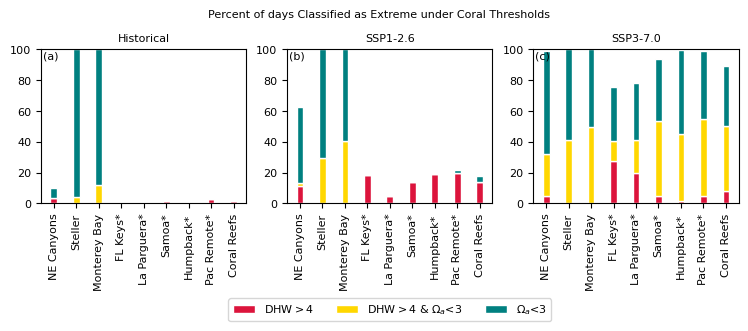

In [30]:
# first example: ESM4_ssp126_D1, NE Canyons
plist=['tos','hplusos','omega_arag_0',('tos','hplusos'),('tos','omega_arag_0')]
psites=['NE Canyons','Steller', 'Monterey Bay', 'FL Keys', 'La Parg', 'Samoa', 
        'Humpback', 'Pac Remote', 'Coral']
def tr(el):
    if el=='La Parg': x1= 'La Parguera'
    elif el=='Coral': x1= 'Coral Reefs'
    else: x1=el
    if hascoral[el]: x1=x1+'*'
    return x1
psites2=[tr(el) for el in psites]
xv=np.arange(len(psites))
fig,ax=plt.subplots(1,len(scenList),figsize=(9,2),gridspec_kw={'hspace':.35})
ww=0.3

colors=['crimson','gold','teal']
for ind, iscen in enumerate(scenList):
    bottom=np.zeros(len(psites))
    v1=[PctAT[(lkey,iscen)]['dhw_4']-PctAT[(lkey,iscen)][('dhw_4','omega_arag_0_3')] for lkey in psites]
    rects1=ax[ind].bar(xv,v1,ww,label=f'DHW$>$4',bottom=bottom,color=colors[0],edgecolor='w')
    bottom+=v1
    v2=[PctAT[(lkey,iscen)][('dhw_4','omega_arag_0_3')] for lkey in psites]
    rects2=ax[ind].bar(xv,v2,ww,label=f'DHW$>$4 & $\Omega _a$<3',bottom=bottom,color=colors[1],edgecolor='w')
    bottom+=v2
    v3=[PctAT[(lkey,iscen)]['omega_arag_0_3']-PctAT[(lkey,iscen)][('dhw_4','omega_arag_0_3')] for lkey in psites]
    rects2C=ax[ind].bar(xv,v3,ww,label=f'$\Omega _a$<3',bottom=bottom,color=colors[2],edgecolor='w')
    
    for ind, iscen in enumerate(scenList):
        ax[ind].set_ylim(0,100)
        ax[ind].set_xticks(xv,psites2,rotation=90)
ax[0].set_title('Historical')
ax[1].set_title('SSP1-2.6')
ax[2].set_title('SSP3-7.0')

ax[1].legend(loc='lower center', ncols=3,bbox_to_anchor=[0.5,-.8])
# ax[1,1].legend(loc='lower center', ncols=3,bbox_to_anchor=[0.5,-.75])
fig.suptitle('Percent of days Classified as Extreme under Coral Thresholds',y=1.08);
ax[0].annotate('(a)',[-0.5,94])
ax[1].annotate('(b)',[-0.5,94])
ax[2].annotate('(c)',[-0.5,94])

fig.savefig(f'MPA_extremes_coral.png',
             dpi=300,bbox_inches='tight')